### 検定の考え方
#### 有意性検定
仮説検定の目的は、母集団について仮定された命題を、標本に基づいて検証することである。
理論比からのずれが誤差の範囲内であるか、それ以上の何かの意味のあるものかということが重要である。
後者の場合、統計学では仮説からのずれは有意であるという。
ここに立てられた仮説を統計的仮説または仮説という。したがって、仮説検定とは統計的仮説の有意性検定にほかならない。
有意性は標本が有意なずれを示す確率で表される。あらかじめその程度の基準の確率である有意水準$\alpha$を考えておく。
仮説検定とは、仮説が有意であるか否かに応じてそれを棄却するかしないかを決定することである。

#### 帰無仮説と対立仮説
もとの仮説を帰無仮説、これと対立する仮説を対立仮説という。
それぞれ、$H_0,H_1$あるいは$H_1,H_2$と記す。
ここで、2つの誤り、(a)帰無仮説が正しいのに、それを棄却する第一種の誤り、および(b)帰無仮説が誤っているのに、それを採択する第二種の誤りが考えられる。

#### 帰無仮説の採択について
有意性検定は、帰無仮説の下でわれわれが期待する結果が生じなかったことを根拠として、仮説を棄却、否定することが主な内容である。
これは、論理学では背理法といわれているものである。

#### 棄却域と両側・片側検定
ここでは、t検定の例を考える。
正規母集団$N(\mu,\sigma^2)$から大きさ$n=25$の標本を抽出して、$\bar{X}=13.7,s=2.3$を得た。
これをもとに帰無仮説
$$
H_0:\mu=15
$$
を対立仮説
$$
H_1:\mu\neq 15
$$
に対して、有意水準$\alpha=0.05$で検定する。
検定に用いる統計量(検定統計量)として、スチューデントのt統計量を計算すると、
$$
t=\frac{13.7-15}{2.3\sqrt{25}}=-2.83
$$
となる。
有意水準$\alpha=0.05$にちょうど対応する$t$分布$t(24)$のパーセント点は、$t_{0.025}(24)=2.06$であるから、$|-2.83|>2.06$より、有意水準5%で帰無仮説を棄却する。

いま、帰無仮説はそのままで、対立仮説を、
$$
H_1':\mu<15
$$
とすると、$\bar{X}$が$\mu=15$より相当に小さくなった場合にだけ帰無仮説を棄却すればよいから、
$$
t=(\bar{X}-15)\ /\ (2\sqrt{n})
$$
において、$t$が十分負になったときにだけ、帰無仮説を棄却すればよい。
いま、$t_{0.05}(24)=1.71$であるから、$-2.83<-1.71$、よって、この場合も有意水準5%で帰無仮説を棄却する。

片側及び両側検定における棄却域を図に示す。

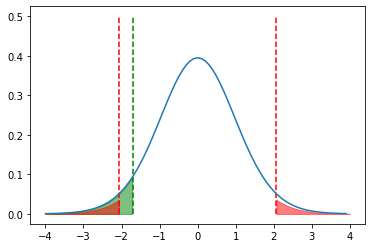

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# t分布
x = np.arange(-4,4,0.1)
t_dist = stats.t.pdf(x, df=25)

# パーセント点
t0025 = stats.t.ppf(0.025,24)
t005 = stats.t.ppf(0.05,24)

# プロット
plt.plot(x, t_dist)
plt.vlines([t0025, -t0025],0,0.5, color='red', linestyles='--')
plt.vlines([t005],0,0.5, color='green', linestyles='--')

plt.fill_between(x=np.arange(-4,t005,0.01), y1=stats.t.pdf(np.arange(-4,t005,0.01), df=25), color='green', alpha=.5)
plt.fill_between(x=np.arange(-4,t0025,0.01), y1=stats.t.pdf(np.arange(-4,t0025,0.01), df=25)*0.7, color='red', alpha=.5)
plt.fill_between(x=np.arange(-t0025,4,0.01), y1=stats.t.pdf(np.arange(-t0025,4,0.01), df=25)*0.7, color='red', alpha=.5)

帰無仮説の棄却すべき統計量の値の集合を棄却域といい、棄却しない領域を採択域という。
採択域は%T=0%の周辺の領域となるが、棄却域は対立仮説が$H_1$のような両側対立仮説のときは、$t$の値が著しく0から外れた領域
$$
|t|>t_{\alpha\ /\ 2}(n-1)
$$
となる。
これを両側検定という。
$H_1'$のような片側対立仮説に対しては、$\bar{X}$が十分小さいところに棄却域が定められ、片側検定となる。
$$
t<-t_{\alpha}(n-1)
$$
となる。なた、$\mu>c$の形の片側対立仮説もあるが、
$$
t>t_{\alpha}(n-1)
$$
が棄却域となる。

### 正規母集団に対する仮説検定
#### 母平均に関する検定
##### 両側検定
両側検定では、帰無仮説、対立仮説は、
$$
H_0:\mu=\mu_0,\hspace{5mm}H_1:\mu\neq\mu_0
$$
で与えられる。
$\mu$に関する検定は標本平均$\bar{X}$が$\mu_0$からどれくらい離れているかを比較することによって行われる。
$\sigma^2$が既知のとき　検定統計量$Z$は、$\bar{X}$の標準化変数
$$
Z=\frac{\bar{X}-\mu}{\sigma\ /\ \sqrt{n}}
$$
である。
帰無仮説が正しければ、$\mu=\mu_0$において$Z$は標準正規分布$N(0,1)$に従う。
パーセント点$Z_{\alpha\ /\ 2}$と比較して$|Z|>Z_{\alpha/2}$では$H_0$を棄却し、$Z\leq Z_{\alpha\ /\ 2}$では$H_0$を棄却しない。
$\sigma^2$が未知のとき　母分散$\sigma^2$が未知であるときは、$\sigma^2$を$s^2$で置き換えたスチューデントのt統計量
$$
t=\frac{\bar{X}-\mu}{s\ /\ \sqrt{n}}
$$
を検定統計量とする。仮説が正しければ、$\mu=\mu_0$のときには、$t$は自由度$n-1$の$t$分布$t(n-1)$に従うからパーセント点$t_{\alpha\ /\ 2}(n-1)$と比較して、$|t|>t_{\alpha\ /\ 2}$では$H_0$を棄却し、$t\leq t_{\alpha\ /\ 2}$では$H_0$を棄却しない。
これらの検定をスチューデントのt検定と呼ぶ。

ポケモンデータを準備し、これを母集団とする。

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

d = pd.read_csv('C:/Users/tanak/OneDrive/ドキュメント/pokemon_for_stats.csv').iloc[:,1:]
gen = ["第1世代"]*151+["第2世代"]*100+["第3世代"]*135+["第4世代"]*107+["第5世代"]*156+["第6世代"]*72+["第7世代"]*88+["第8世代"]*89
d['世代'] = gen

num_cols = ['重さ','高さ','HP','攻撃','防御','特攻','特防','素早さ','合計']
d.head()

,No.,ポケモン,タイプ1,タイプ2,重さ,高さ,HP,攻撃,防御,特攻,特防,素早さ,合計,世代
0,1,フシギダネ,くさ,どく,6.9,0.7,45,49,49,65,65,45,318,第1世代
1,2,フシギソウ,くさ,どく,13.0,1.0,60,62,63,80,80,60,405,第1世代
2,3,フシギバナ,くさ,どく,100.0,2.0,80,82,83,100,100,80,525,第1世代
3,4,ヒトカゲ,ほのお,NaN,8.5,0.6,39,52,43,60,50,65,309,第1世代
4,5,リザード,ほのお,NaN,19.0,1.1,58,64,58,80,65,80,405,第1世代


「第1世代のポケモンの種族値は全体に対して差はあるか」を確認する。
差はない、つまり「第1世代のポケモンの種族値と全体の種族値は等しい」を帰無仮説、「第1世代のポケモンの種族値と全体の種族値は異なる」を対立仮説として検定を行う。有意水準は5%とする。

In [3]:
n = 10

d_1gen = d.query("世代=='第1世代'").sample(n)
d_1gen

,No.,ポケモン,タイプ1,タイプ2,重さ,高さ,HP,攻撃,防御,特攻,特防,素早さ,合計,世代
66,67,ゴーリキー,かくとう,NaN,70.5,1.5,80,100,70,50,60,45,405,第1世代
16,17,ピジョン,ノーマル,ひこう,30.0,1.1,63,60,55,50,50,71,349,第1世代
25,26,ライチュウ,でんき,NaN,30.0,0.8,60,90,55,90,80,110,485,第1世代
51,52,ニャース,ノーマル,NaN,4.2,0.4,40,45,35,40,40,90,290,第1世代
136,137,ポリゴン,ノーマル,NaN,36.5,0.8,65,60,70,85,75,40,395,第1世代
131,132,メタモン,ノーマル,NaN,4.0,0.3,48,48,48,48,48,48,288,第1世代
86,87,ジュゴン,みず,こおり,120.0,1.7,90,70,80,70,95,70,475,第1世代
43,44,クサイハナ,くさ,どく,8.6,0.8,60,65,70,85,75,40,395,第1世代
9,10,キャタピー,むし,NaN,2.9,0.3,45,30,35,20,20,45,195,第1世代
65,66,ワンリキー,かくとう,NaN,19.5,0.8,70,80,50,35,35,35,305,第1世代


In [4]:
# 有意水準
alpha = 0.05

# 母集団の平均値
mu = d['合計'].mean()

# 対称の平均値・標準偏差
X_bar = d_1gen['合計'].mean()
s = d_1gen['合計'].std(ddof=1)

# t統計量
t = (X_bar-mu)/(s/np.sqrt(n))
# p値
p = stats.t.sf(t, n-1)*2

# t分布のパーセント点
t0025 = stats.t.ppf(alpha/2, n-1)
print('t 0.025: ', -t0025)

print('t value: ', t)
print('p value: ', p)
print('judge: ', p<alpha)

t 0.025:  2.262157162740992
t value:  -2.263445638144181
p value:  1.9501051900089519
judge:  False


帰無仮説は棄却されず採択される。
「第1世代のポケモンの種族値は全体に対して差があるとは言えない」と結論される。

同様の計算はscipyで実装されている関数を利用できる。

In [5]:
stats.ttest_1samp(d_1gen['合計'], d['合計'].mean(), alternative='two-sided')

Ttest_1sampResult(statistic=-2.263445638144181, pvalue=0.049894809991048145)

#### 片側検定
帰無仮説、対立仮説は、
$$
H_0:\mu=\mu_0,\hspace{5mm}H_1:\mu>\mu_0
$$
で与えられる時を考える(右肩側対立仮説)。

「かくとうタイプのポケモンは全体と比べて攻撃力が高い」という主張が正しいかを確認を行う。
帰無仮説は「かくとうタイプの攻撃力の平均値と全体の攻撃力の平均値が等しい」であり対立仮説は「かくとうタイプのポケモンは全体と比べて攻撃力が高い」である。高いことを確認したので右片側検定を行う。
有意水準は5%とする。

In [6]:
d_kakuto = d.query("タイプ1=='かくとう'").sample(n)
d_kakuto

,No.,ポケモン,タイプ1,タイプ2,重さ,高さ,HP,攻撃,防御,特攻,特防,素早さ,合計,世代
888,889,ザマゼンタ,かくとう,NaN,210.0,2.9,92,130,115,80,115,138,670,第8世代
531,532,ドッコラー,かくとう,NaN,12.5,0.6,75,80,55,25,35,35,305,第5世代
533,534,ローブシン,かくとう,NaN,87.0,1.4,105,140,95,55,65,45,505,第5世代
891,892,ウーラオス(いちげきのかた),かくとう,あく,105.0,1.9,100,130,100,63,60,97,550,第8世代
765,766,ナゲツケサル,かくとう,NaN,82.8,2.0,100,120,90,40,60,80,490,第7世代
700,701,ルチャブル,かくとう,ひこう,21.5,0.8,78,92,75,74,63,118,500,第6世代
236,237,カポエラー,かくとう,NaN,48.0,1.4,50,95,95,35,110,70,455,第2世代
307,308,チャーレム,かくとう,エスパー,31.5,1.3,60,60,75,60,75,80,410,第3世代
618,619,コジョフー,かくとう,NaN,20.0,0.9,45,85,50,55,50,65,350,第5世代
619,620,コジョンド,かくとう,NaN,35.5,1.4,65,125,60,95,60,105,510,第5世代


In [7]:
# 有意水準
alpha = 0.05

# 母集団の平均値
mu = d['攻撃'].mean()

# 対称の平均値・標準偏差
X_bar = d_kakuto['攻撃'].mean()
s = d_kakuto['攻撃'].std(ddof=1)

# t統計量
t = (X_bar-mu)/(s/np.sqrt(n))
# p値
p = stats.t.sf(t, n-1)

# t分布のパーセント点
t095 = stats.t.ppf(1-alpha, n-1)
print('t 0.95: ', t095)

print('t pavlue: ', t)
print('p value: ', p)
print('judge: ', p<alpha)

t 0.95:  1.8331129326536335
t pavlue:  3.4536095631774475
p value:  0.0036166906944846053
judge:  True


帰無仮説は棄却され、「かくとうタイプのポケモンは全体と比べて攻撃力が高い」という対立仮説が採択された。

scipyを使って同様の計算を行う。

In [8]:
stats.ttest_1samp(d_kakuto['攻撃'], d['攻撃'].mean(), alternative='greater')

Ttest_1sampResult(statistic=3.4536095631774466, pvalue=0.0036166906944846127)

#### 母分散に対する仮説検定
母分散$\sigma^2$に対する帰無仮説$H_0:\sigma^2=\sigma_0^2$の検定は、標本分散$s^2$によって検定統計量
$$
\chi^2=(n-1)s^2\ /\ \sigma_0^2
$$
が、帰無仮説のもとで自由度$(n-1)$の$\chi^2$分布$\chi^2(n-1)$に従うという性質を用いて行われる。
検定の有意水準を$\alpha$とするとき、$\chi^2(n-1)$のパーセント点$\chi_{1-\alpha\ /\ 2}^2(n-1),\chi_{\alpha\ /\ 2}^2(n-1)$などを求めておき、

(a)対立仮説が$H_1:\sigma^2\neq\sigma_0^2$のときは、両側検定
$\chi_{1-\alpha\ /\ 2}^2(n-1)<\chi^2<\chi_{\alpha\ /\ 2}^2(n-1)$のとき$H_0$を棄却せず、それ以外は棄却する
(b)対立仮説が$H_1:\sigma^2>\sigma_0^2$のときは、右片側検定
$\chi^2>\chi_{\alpha}^2(n-1)$のとき$H_0$を棄却し、それ以外は棄却しない
同じく、$H_1:\sigma^2<\sigma_0^2$のときは、右片側検定
$\chi^2<\chi_{1-\alpha}^2(n-1)$のとき$H_0$を棄却し、それ以外は棄却しない
これらの検定を正規母集団の母分散についての$\chi^2$検定という。

ここでは例として、「第2世代のポケモンの攻撃力は全体と比べてばらつきが異なるか」を調べる。
帰無仮説は「第2世代のポケモンの攻撃力の分散は全体の分散と等しい」であり、対立仮説は「第2世代のポケモンの攻撃力は全体と比べてばらつきが異なる」である。有意水準5%の両側検定を行う。

In [9]:
# 有意水準
alpha = 0.05

# 標本数
n = 20

# サンプリング
d_2gen = d.query("世代=='第2世代'").sample(n)

# 母分散
sigma2 = d['攻撃'].var()

# 標本分散
s2 = d_2gen['攻撃'].var(ddof=1)

print('sigma0^2: ', sigma2)
print('s2: ', s2)

# カイ二乗統計量
chi_value = (n-1)*(s2)/(sigma2)
# p値
p = stats.chi2.sf(chi_value, df=n-1)*2

# パーセント点
chi0025 = stats.chi2.ppf(0.025, df=n-1)
chi0975 = stats.chi2.ppf(0.975, df=n-1)
print('chi 0.025 - 0.975: ', chi0025, chi0975)

print('chi pavlue: ', chi_value)
print('p value: ', p)
print('judge: ', p<alpha)

sigma0^2:  880.0453938269858
s2:  713.1447368421053
chi 0.025 - 0.975:  8.906516481987971 32.85232686172969
chi pavlue:  15.396648962705486
p value:  1.3941520374094625
judge:  False


帰無仮説は棄却されず、「第2世代のポケモンの攻撃力の分散は全体の分散と異なる」とはいえないと結論される。
次に「いわタイプのポケモンの防御力の分散は全体の分散より大きい」ことを確かめる。
帰無仮説は「いわタイプのポケモンの防御力の分散は全体の分散と等しい」とし、対立仮説を「いわタイプのポケモンの防御力の分散は全体の分散より大きい」とした有意水準5%の右片側検定を行う。

In [10]:
# 有意水準
alpha = 0.05

# 標本数
n = 30

# サンプリング
d_kakuto = d.query("タイプ1=='いわ'").sample(n)

# 母分散
sigma2 = d['防御'].var()

# 標本分散
s2 = d_kakuto['防御'].var(ddof=1)

print('sigma0^2: ', sigma2)
print('s2: ', s2)

# カイ二乗統計量
chi_value = (n-1)*(s2)/(sigma2)
# p値
p = stats.chi2.sf(chi_value, df=n-1)

# パーセント点
chi095 = stats.chi2.ppf(0.95, df=n-1)
print('chi 0.95: ', chi095)

print('chi pavlue: ', chi_value)
print('p value: ', p)
print('judge: ', p<alpha)

sigma0^2:  874.0162481719565
s2:  1325.4436781609193
chi 0.95:  42.55696780429269
chi pavlue:  43.978434894158035
p value:  0.03687465019157979
judge:  True


帰無仮説は棄却され、「いわタイプのポケモンの防御力の分散は全体の分散より大きい」という対立仮説が採択された。

#### 母平均の差の検定
たとえば、新しい治療法の効果を調べる場合を考え、患者を二つのグループに分けて、一方のみに新しい治療法を行い、二つのグループで結果に差があるかどうかを検定する。
これを2標本検定という。
治療等を行ったグループを一般的に処理群、行わずに比較対照の基準とするグループを対照群あるいは制御群という。
二つの正規母集団$N(\mu_1,\sigma_1^2),N(\mu_2,\sigma_2^2)$それぞれから大きさ$m,n$の標本、$X_1,X_2,\cdots,Y_1,Y_2,\cdots,Y_n$を抽出したとする。このとき、帰無仮説は
$$
H_0:\mu_1=\mu_2
$$
であり、対立仮説は、
(a)両側ならば$H_1:\mu_1\neq\mu_2$
(b)片側ならば$H_1:\mu_1>\mu_2$または$H_1:\mu_1<\mu_2$
である。
2つの分散が等しく、$\sigma_1^2=\sigma_2^2=\sigma^2$であるときには、二つの標本平均を$\bar{X},\bar{Y}$とし、$\sigma^2$を
$$
s^2=\frac{\sum_{i=1}^m(X_i-\bar{X})^2+\sum_{j=1}^n(Y_i-\bar{Y})^2}{m+n-2}=\frac{(m-1)s_1^2+(n-1)s_2^2}{m+n-2}
$$
で推定すると、$H_0$のもとでは2標本t統計量
$$
t=\frac{\bar{X}-\bar{Y}}{s\sqrt{\frac{1}{m}+\frac{1}{n}}}
$$
は、$m+n-2$のt分布$t(m+n-2)$に従う。
(a)では両側検定となり、$|t|>t_{\alpha\ /\ 2}(m+n-2)$のとき帰無仮説を棄却し、それ以外は棄却しない。
(b)では片側検定となり、それぞれ$t>t_{\alpha}(m+n-2),t<-t_{\alpha}(m+n-2)$のとき帰無仮説を棄却し、それ以外は棄却しない。

母分散が等しくないときは、$s_1^2=\sum(X_i-\bar{X})\ /\ (m-1),s_2^2=\sum(X_i-\bar{X})\ /\ (n-1)$とすると、帰無仮説が正しい場合、
$$
t=\frac{\bar{X}-\bar{Y}}{\sqrt{\frac{s_1^2}{m}+\frac{s_2^2}{n}}}
$$
は近似的に自由度が
$$
\nu=\frac{(s_1^2\ /\ m+s_2^2\ /\ n)^2}{\frac{(s_1^2\ /\ m)^2}{m-1}+\frac{(s_2^2\ /\ n)^2}{n-1}}
$$
に最も近い整数$\nu^*$の自由度の$t$分布$t(\nu^*)$に従う。
この$t$値を使用した検定をウェルチの検定と呼ぶ。

ここでは、「第1世代のポケモンの攻撃力と第2世代のポケモンの攻撃力が変わらない」という帰無仮説のもと、有意水準5%の両側検定を行う。
ただし、第1世代のポケモンの攻撃力と第2世代のポケモンの攻撃力は等分散であると仮定した。

In [11]:
# 有意水準
alpha = 0.05

# 標本数
m = 30
n = 20

# サンプリング
d_1gen = d.query("世代=='第1世代'").sample(m)
d_2gen = d.query("世代=='第2世代'").sample(n)

# 標本平均
X_bar = d_1gen['攻撃'].mean()
Y_bar = d_2gen['攻撃'].mean()

# 母分散
sigma2 = d['攻撃'].var()

# 標本分散
s12 = d_1gen['攻撃'].var(ddof=1)
s22 = d_2gen['攻撃'].var(ddof=1)

# 標本分散の合計
s2 = ((m-1)*s12+(n-1)*s22)/(m+n-2)

# t統計量
t_value = (X_bar-Y_bar)/(np.sqrt(s2*(1/m+1/n)))
# p値
p = stats.t.sf(t_value, m+n-2)*2

print('X_bar: ',X_bar)
print('Y_bar: ',Y_bar)

print('sigma0^2: ', sigma2)
print('s2: ', s2)

# パーセント点
t0025 = stats.t.ppf(0.025, df=m+n-2)
t0975 = stats.t.ppf(0.975, df=m+n-2)
print('t 0.025 - 0.975: ', t0025, t0975)

print('t pavlue: ', t_value)
print('p pavlue: ', p)
print('judge: ', p<alpha)

X_bar:  74.5
Y_bar:  69.55
sigma0^2:  880.0453938269858
s2:  667.9677083333332
t 0.025 - 0.975:  -2.010634754696446 2.0106347546964454
t pavlue:  0.6634651080559695
p pavlue:  0.5102068014325126
judge:  False


「第1世代のポケモンの攻撃力と第2世代のポケモンの攻撃力が変わらない」という帰無仮説は棄却されず、「第1世代のポケモンの攻撃力と第2世代のポケモンの攻撃力に違いがある」とは言えない。

scipyを使った計算例も示す。

In [12]:
stats.ttest_ind(d_1gen['攻撃'], d_2gen['攻撃'], alternative='two-sided')

Ttest_indResult(statistic=0.6634651080559695, pvalue=0.5102068014325126)

(棄却される例として)もう1つ例を示す。

「かくとうタイプの方がフェアリータイプより攻撃力が高い」ことを確認するため、「かくとうタイプとフェアリータイプは攻撃力が同じ」という帰無仮説のもと、右側片側検定を行う。有意水準は5%とする。
ただし、かくとうタイプのポケモンの攻撃力とフェアリータイプのポケモンの攻撃力は等分散ではない仮定した。

In [13]:
# 有意水準
alpha = 0.05

# 標本数
m = 30
n = 20

# サンプリング
d_type1 = d.query("タイプ1=='かくとう'").sample(m)
d_type2 = d.query("タイプ2=='フェアリー'").sample(n)

# 標本平均
X_bar = d_type1['攻撃'].mean()
Y_bar = d_type2['攻撃'].mean()

# 母分散
sigma2 = d['攻撃'].var()

# 標本分散
s12 = d_type1['攻撃'].var(ddof=1)
s22 = d_type2['攻撃'].var(ddof=1)

# t統計量
t_value = (X_bar-Y_bar)/(np.sqrt((s12/m+s22/n)))
# p値
p = stats.t.sf(t_value, m+n-2)

print('X_bar: ',X_bar)
print('Y_bar: ',Y_bar)

# パーセント点
t005 = stats.t.ppf(0.95, df=m+n-2)
print('t 0.95: ', t005)

print('t pavlue: ', t_value)
print('p pavlue: ', p)
print('judge: ', p<alpha)

X_bar:  98.76666666666667
Y_bar:  65.75
t 0.95:  1.6772241953450393
t pavlue:  4.06871259114461
p pavlue:  8.76429109569337e-05
judge:  True


帰無仮説は棄却され、「かくとうタイプの方がフェアリータイプより攻撃力が高い」という対立仮説が採択された。

ここでもscipyによる計算例を示す。

In [14]:
stats.ttest_ind(d_type1['攻撃'], d_type2['攻撃'], equal_var=False, alternative='greater')

Ttest_indResult(statistic=4.06871259114461, pvalue=0.00010545831099807586)

#### 母分散の比の検定
母分散の比の検定の帰無仮説は
$$
H_0:\sigma_1^2=\sigma_2^2
$$
対立仮説は
$$
H_0:\sigma_1^2\neq\sigma_2^2
$$
である。
ここで、$H_0$のもとでのフィッシャーの分散比を
$$
F=s_1^2\ /\ s_2^2
$$
ただし、
$$
s_1^2=\sum(X_i-\bar{X})\ /\ (m-1),\hspace{5mm},s_2^2=\sum(X_i-\bar{X})\ /\ (n-1)
$$
とすると、帰無仮説が正しい場合、$F$は自由度$(m-1,n-1)$のF分布$F(m-1,n-1)$に従う。
したがって、このF値が
$$
F_{1-\alpha\ /\ 2}(m-1,n-1)\leq F \leq F_{\alpha\ /\ 2}(m-1,n-1)
$$
であるときは帰無仮説を棄却せず
$$
F<F_{1-\alpha\ /\ 2}(m-1,n-1)またはF>F_{\alpha\ /\ 2}(m-1,n-1)
$$
であるときは、帰無仮説を棄却する。
これらF統計量を検定統計量として用いる検定を一般にF検定という。

ここでは、「第1世代のポケモンの攻撃力と第2世代のポケモンの攻撃力分散が等しい」を帰無仮説、「第1世代のポケモンの攻撃力と第2世代のポケモンの攻撃力分散は異なる」を対立仮説として、有意水準5%の両側検定を行う。

In [15]:
# 有意水準
alpha = 0.05

# 標本数
m = 30
n = 20

# サンプリング
d_1gen = d.query("世代=='第1世代'").sample(m)
d_2gen = d.query("世代=='第2世代'").sample(n)

# 標本分散
s12 = d_1gen['攻撃'].var(ddof=1)
s22 = d_2gen['攻撃'].var(ddof=1)

# F統計量
F_value = s12/s22
# p値
p = stats.f.sf(F_value, dfn=m-1, dfd=n-1)*2
if p >= 1:
    p = 1

# パーセント点
F0025 = stats.f.ppf(0.025, dfn=n-1, dfd=m-1)
F0975 = stats.f.ppf(0.975, dfn=n-1, dfd=m-1)
print('F 0025 - F 0975: ', F0025, F0975)

print('F value: ', F_value)
print('p pavlue: ', p)
print('judge: ', p<alpha)

F 0025 - F 0975:  0.4163296675877341 2.2312738331007584
F value:  1.3918921554800008
p pavlue:  0.4567599372718125
judge:  False


帰無仮説は棄却されず、「第1世代のポケモンの攻撃力と第2世代のポケモンの攻撃力分散は異なるといえない」と結論される。

In [16]:
stats.levene(d_1gen['攻撃'], d_2gen['攻撃'])

LeveneResult(statistic=1.0083634528016154, pvalue=0.32033074637027253)

次に、平均の差の検定で見たようにかくとうタイプとフェアリータイプについて確認する。
「かくとうタイプとフェアとリータイプの攻撃力の分散は等しい」を帰無仮説、「かくとうタイプとフェアリータイプの攻撃力の分散は異なる」を対立仮説として、有意水準5%の右片側検定を行う。

In [29]:
# 有意水準
alpha = 0.05

# 標本数
m = 30
n = 20

# サンプリング
d_type1 = d.query("タイプ1=='かくとう'").sample(m)
d_type2 = d.query("タイプ2=='フェアリー'").sample(n)

# 標本分散
s12 = d_type1['攻撃'].var(ddof=1)
s22 = d_type2['攻撃'].var(ddof=1)

# F統計量
F_value = s12/s22
# p値
p = stats.f.sf(F_value, dfn=m-1, dfd=n-1)
if p >= 1:
    p = 1

# パーセント点
F095 = stats.f.ppf(0.95, dfn=m-1, dfd=m-1)
print('F 095: ', F095)

print('F value: ', F_value)
print('p pavlue: ', p)
print('judge: ', p<alpha)

F 095:  1.8608114354760754
F value:  0.9067798189558943
p pavlue:  0.6032878016690615
judge:  False


帰無仮説は棄却されず、「かくとうタイプはフェアの攻撃力の分散はリータイプの攻撃力の分散が異なるとはいえない」と結論される。

In [31]:
stats.bartlett(d_type1['攻撃'], d_type2['攻撃'])

BartlettResult(statistic=0.054119052330868195, pvalue=0.8160448315732844)

### いろいろのカイ二乗検定
#### 適合度の検定
仮定された理論上の確率分布に対して、標本から求められた度数が適合するか否かを検証するのが適合度の$\chi^2$検定である。
ある属性$A$によって、$n$個の個体が$k$種のカテゴリー$A_1,A_2,\cdots,A_k$へ分類されたとし、各カテゴリへ属する観測度数が$f_1,f_2,\cdots,f_k$であったとする。これが、各カテゴリの理論確率$p_1,p_2,\cdots,p_k$に適合するかを見るためには、理論度数$np_1,np_2,\cdots,np_k$を、観測度数と比べ、K.ピアソンの適応基準
$$
\chi^2=\sum_{i=1}^k\frac{(f_i-np_i)^2}{np_i}
$$
で判断すればよい。
この適合度の$\chi^2$統計量$\chi^2$は$n$が大きいとき、自由度$k-1$の$\chi^2$分布$\chi^2(k-1)$に従う。
帰無仮説を、
$$
H_0:P(A_1)=p_1,\cdots,P(A_k)=p_k
$$
とするとき、
$$
\chi^2>\chi^2_\alpha(k-1)
$$
ならば、仮説$H_0$は有意水準$\alpha$で棄却される。
ここで、適合度の検定の原理を
$$
\chi^2=\sum(O-E)^2\ /\ E
$$
と要約する。ここで、$(O-E)/E$は相対誤差であり、$\sum$は一般にすべてのカテゴリにわたる和である。
#### 分割表の独立性と検定
$n$個の個体に対して二つの異なる属性$A,B$を同時に測定したとする。
$A$は$A_1,A_2,\cdots,A_r$のカテゴリに、$B$は$B_1,B_2,\cdots,B_c$のカテゴリに分割されているとする。
この二つの属性について度数を集計することにより、分割表を得ることができる。
分割表において独立とは、$A_i\cap B_j$の各確率に対し、帰無仮説
$H_0$すべての$i,j$に対し、$P(A_i\cap B_j)=P(A_i)P(B_j)$
であることをいう。いいかえれば、$A_1,\cdots,A_r$の条件付確率がすべての$B_j$によらないことである。
$$
P(A_i\cap B_j)=p_{ij}\\
P(A_i)=p_{i・}=\sum_jp_{ij}\\
P(B_j)=p_{・j}=\sum_ip_{ij}
$$
と表せば、$p_{i・},p_{・j}$は$p_{ij}$の周辺確率分布で、独立とは、
すべての$i,j$に対し、$p_{ij}=p_{i・}p_{・j}$
が成立することを意味する。
$p_{i・},p_{・j}$は、分割表の周辺度数$f_{i・},f_{・j}$に対応するから、相対度数による推定値
$$
\hat{p}_{i・}=f_{i・}\ /\ n\hspace{5mm}\hat{p}_{・j}=f_{・j}\ /\ n
$$
によって置き換えれば、$H_0$が成立しているときには、$\hat{p}_{ij}=\hat{p}_{i・}\hat{p}_{・j}$は確率$p_{ij}=P(A_i\cap B_i)$の推定値
、そこの理論度数は、
$$
E_{ij}=n\hat{p}_{i・}\hat{p}_{・j}=f_{i・}f_{・j}\ /\ n
$$
となる。
他方、観測度数を
$$
O_{ij}=f_{ij}
$$
とおいて、$n$が大きいとき、適合度の検定の原理を用いれば、独立性の$\chi^2$検定の基準
$$
\begin{align}
\chi^2&=\sum_i\sum_j\frac{(f_{ij}-f_{i・}-f_{・j}\ /\ n)^2}{f_{i・}f_{・j}/n}\\
&=\sum_i\sum_j\frac{(nf_{ij}-f_{i・}-f_{・j})^2}{nf_{i・}f_{・j}}
\end{align}
$$
を得る。$\chi^2$分布の自由度は$(r-1)(c-1)$となる。

世代とタイプの分割表を示す。

In [19]:
d_cross = pd.crosstab(d['世代'],  d['タイプ1'])
d_cross2 = pd.concat([d_cross, pd.DataFrame(d_cross.sum(axis=0), columns=['計']).T])
d_cross2['計'] = d_cross2.sum(axis=1)
d_cross2

タイプ1,あく,いわ,かくとう,くさ,こおり,じめん,でんき,どく,はがね,ひこう,ほのお,みず,むし,エスパー,ゴースト,ドラゴン,ノーマル,フェアリー,計
第1世代,0,9,7,12,2,8,9,14,0,0,12,28,12,8,3,3,22,2,151
第2世代,5,4,2,9,4,3,6,1,2,0,8,18,10,7,1,0,15,5,100
第3世代,4,8,4,12,6,6,4,3,9,0,6,24,12,8,4,7,18,0,135
第4世代,3,6,2,13,3,4,7,6,3,0,5,13,8,7,6,3,17,1,107
第5世代,13,6,7,15,6,8,8,2,4,1,8,17,18,14,5,7,17,0,156
第6世代,3,8,3,5,2,0,3,2,4,2,8,5,3,3,4,4,4,9,72
第7世代,1,5,4,12,0,2,4,6,4,0,6,9,9,6,4,3,12,1,88
第8世代,7,4,7,8,5,3,9,1,4,4,5,9,3,5,4,4,4,3,89
計,36,50,36,86,28,34,50,35,30,7,58,123,75,58,31,31,109,21,898


期待度数の計算を行う。

In [20]:
E = pd.DataFrame(np.matrix(d_cross2.iloc[:,-1]).T @ np.matrix(d_cross2.iloc[-1,:])/len(d))
E

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,6.053452,8.407572,6.053452,14.461024,4.708241,5.717149,8.407572,5.885301,5.044543,1.177060,9.752784,20.682628,12.611359,9.752784,5.212695,5.212695,18.328508,3.531180,151.0
1,4.008909,5.567929,4.008909,9.576837,3.118040,3.786192,5.567929,3.897550,3.340757,0.779510,6.458797,13.697105,8.351893,6.458797,3.452116,3.452116,12.138085,2.338530,100.0
2,5.412027,7.516704,5.412027,12.928731,4.209354,5.111359,7.516704,5.261693,4.510022,1.052339,8.719376,18.491091,11.275056,8.719376,4.660356,4.660356,16.386414,3.157016,135.0
3,4.289532,5.957684,4.289532,10.247216,3.336303,4.051225,5.957684,4.170379,3.574610,0.834076,6.910913,14.655902,8.936526,6.910913,3.693764,3.693764,12.987751,2.502227,107.0
4,6.253898,8.685969,6.253898,14.939866,4.864143,5.906459,8.685969,6.080178,5.211581,1.216036,10.075724,21.367483,13.028953,10.075724,5.385301,5.385301,18.935412,3.648107,156.0
5,2.886414,4.008909,2.886414,6.895323,2.244989,2.726058,4.008909,2.806236,2.405345,0.561247,4.650334,9.861915,6.013363,4.650334,2.485523,2.485523,8.739421,1.683742,72.0
6,3.527840,4.899777,3.527840,8.427617,2.743875,3.331849,4.899777,3.429844,2.939866,0.685969,5.683742,12.053452,7.349666,5.683742,3.037862,3.037862,10.681514,2.057906,88.0
7,3.567929,4.955457,3.567929,8.523385,2.775056,3.369710,4.955457,3.468820,2.973274,0.693764,5.748330,12.190423,7.433185,5.748330,3.072383,3.072383,10.802895,2.081292,89.0
8,36.000000,50.000000,36.000000,86.000000,28.000000,34.000000,50.000000,35.000000,30.000000,7.000000,58.000000,123.000000,75.000000,58.000000,31.000000,31.000000,109.000000,21.000000,898.0


この分割表の$\chi^2$統計量およびp値を示す。

In [21]:
chi2_value = np.sum((d_cross2.values[:-1,:-1] - E.values[:-1,:-1])**2/E.values[:-1,:-1])
chi2_value

203.61047516399066

In [22]:
# p値
p = stats.chi2.sf(chi2_value, df=(E.shape[0]-1)*(E.shape[1]-1))
p

0.0007961578679062336

$\chi^2$分布の有意水準5%のパーセント点の値は次のようになる。

In [23]:
stats.chi2.ppf(0.05, df=(E.shape[0]-1)*(E.shape[1]-1))

117.26828137255845

従って、ポケモンの世代とタイプの数の関係は独立ではなく、何か関係があると結論される。

同様の計算はscipyに実装されている。

In [24]:
stats.chi2_contingency(d_cross2, correction=False)

(203.61047516399066,
 0.0007961578679062336,
 144,
 array([[6.05345212e+00, 8.40757238e+00, 6.05345212e+00, 1.44610245e+01,
         4.70824053e+00, 5.71714922e+00, 8.40757238e+00, 5.88530067e+00,
         5.04454343e+00, 1.17706013e+00, 9.75278396e+00, 2.06826281e+01,
         1.26113586e+01, 9.75278396e+00, 5.21269488e+00, 5.21269488e+00,
         1.83285078e+01, 3.53118040e+00, 1.51000000e+02],
        [4.00890869e+00, 5.56792873e+00, 4.00890869e+00, 9.57683742e+00,
         3.11804009e+00, 3.78619154e+00, 5.56792873e+00, 3.89755011e+00,
         3.34075724e+00, 7.79510022e-01, 6.45879733e+00, 1.36971047e+01,
         8.35189310e+00, 6.45879733e+00, 3.45211581e+00, 3.45211581e+00,
         1.21380846e+01, 2.33853007e+00, 1.00000000e+02],
        [5.41202673e+00, 7.51670379e+00, 5.41202673e+00, 1.29287305e+01,
         4.20935412e+00, 5.11135857e+00, 7.51670379e+00, 5.26169265e+00,
         4.51002227e+00, 1.05233853e+00, 8.71937639e+00, 1.84910913e+01,
         1.12750557e+01, 8.719

### 検出力
有意性検定の理論は、帰無仮説について下す決定が誤っていることを前提としている。
もしも帰無仮説$H_0$が正しければとうてい出そうもない検定量の値が出れば、帰無仮説を偽として棄却する。
したがって、帰無仮説が正しくても、出そうもない棄却域の値がたまたま出てしまい帰無仮説の棄却に帰することがあり得る。
これは第一種の誤りであるが、その確率は有意水準に等しい。
帰無仮説$H_0$が偽であるにも関わらず、たまたま(この確率を$\beta$とする)統計量の値が棄却域に入らなかったために、$H_0$を棄却しない誤りが生じる。これは第2種の誤りである。$\beta$は対立仮説の各値が正しいという条件のもとに棄却域に入らないという確率を求めればよい。
なお、一般に仮説が1個の値のとき単純仮説、2個以上のとき複合仮説という。
$\alpha,\beta$は検定方法、つまり、棄却域の取り方によるが、棄却域の範囲を狭くすれば$\alpha$は小となるが、$\beta$は大となる。
標本の大きさ一定というもとでは、$\alpha,\beta$をともに小さくすることはできない。
有意性検定では、$\alpha$を先に固定してる。
その条件で$\beta$をなるべく小さく、すなわち、第二種の誤りを犯さない確率$1-\beta$をなるべく大きくする、この確率を検出力という。
検出力は、帰無仮説$H_0$が真でないとき、その通りに、これを棄却する確率である。
検出力は、検定方法の良さの基準であり、検出力の大きいものほど、そのような誤りをおかさない厳しい検定である。